# Parameters

In [1]:
BATCH_SIZE = 128
NUM_EPOCHS = 40
LR = 0.001 # learning rate

# Part 1: Load the Covertype Dataset

In [2]:
# Install the required package
!pip install ucimlrepo

# Import the dataset fetcher
from ucimlrepo import fetch_ucirepo

# Fetch the dataset
covertype = fetch_ucirepo(id=31)

# Get features and target
X = covertype.data.features
y = covertype.data.targets

# Display dataset metadata
print("Dataset Overview:")
display(covertype.metadata)

# Check class distribution
print("\nTarget Distribution:")
print(y.value_counts())


Dataset Overview:


{'uci_id': 31,
 'name': 'Covertype',
 'repository_url': 'https://archive.ics.uci.edu/dataset/31/covertype',
 'data_url': 'https://archive.ics.uci.edu/static/public/31/data.csv',
 'abstract': 'Classification of pixels into 7 forest cover types based on attributes such as elevation, aspect, slope, hillshade, soil-type, and more.',
 'area': 'Biology',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate'],
 'num_instances': 581012,
 'num_features': 54,
 'feature_types': ['Categorical', 'Integer'],
 'demographics': [],
 'target_col': ['Cover_Type'],
 'index_col': None,
 'has_missing_values': 'no',
 'missing_values_symbol': None,
 'year_of_dataset_creation': 1998,
 'last_updated': 'Sat Mar 16 2024',
 'dataset_doi': '10.24432/C50K5N',
 'creators': ['Jock Blackard'],
 'intro_paper': None,
 'additional_info': {'summary': 'Predicting forest cover type from cartographic variables only (no remotely sensed data).  The actual forest cover type for a given observation (30 x 30 meter cell


Target Distribution:
Cover_Type
2             283301
1             211840
3              35754
7              20510
6              17367
5               9493
4               2747
Name: count, dtype: int64


#Part 2: Basic Data Cleaning & EDA

In [3]:
# Check for missing values
print("Missing values in each column:")
print(X.isnull().sum())

# Check for duplicate rows
print(f"\nNumber of duplicate rows: {X.duplicated().sum()}")

# Basic statistics
print("\nFeature summary:")
display(X.describe())


Missing values in each column:
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0
Soil_Type12                           0
Soil_Type13                           0
Soil_Type

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,0.051434,0.436074,0.063627
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,0.220882,0.495897,0.244087
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Dataset is clean! but needs to be normalized

#Part 3: Split the Dataset (Train/Validation/Test)

In [4]:
from sklearn.model_selection import train_test_split

# First split: 90% train, 10% temp (which will be split into val and test)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.10, stratify=y, random_state=42
)

# Second split: 5% val, 5% test from temp (which is 10% of original)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42
)

# Check sizes
print(f"Train size: {len(X_train)}")
print(f"Validation size: {len(X_val)}")
print(f"Test size: {len(X_test)}")


Train size: 522910
Validation size: 29051
Test size: 29051


#Part 4: Data Visualization

##Visualize Class Distribution

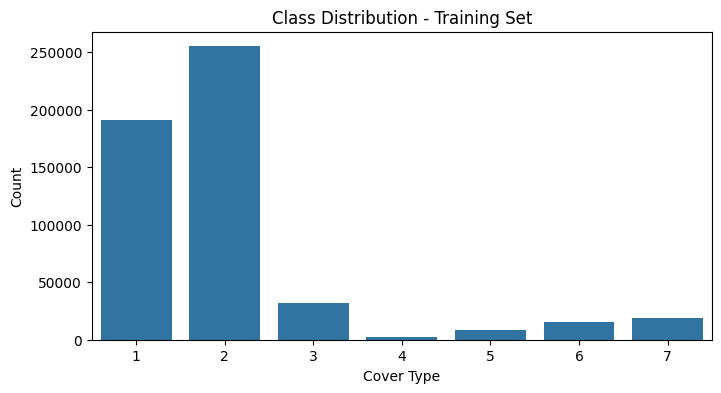

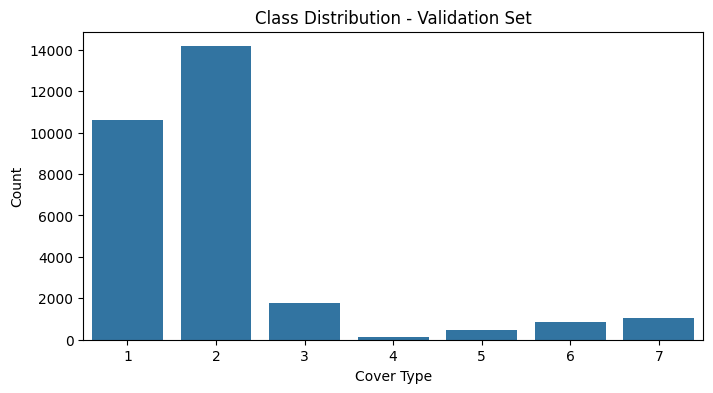

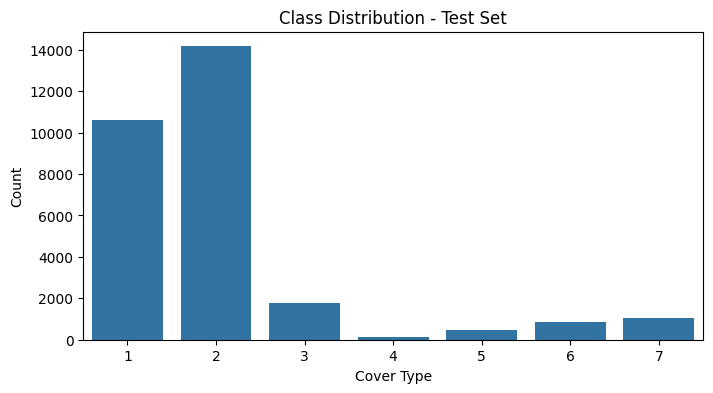

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# Plot class distribution in train, val, and test
def plot_class_distribution(y_data, title):
    # Convert to 1D Series if it's a DataFrame
    if isinstance(y_data, pd.DataFrame):
        y_data = y_data.squeeze()

    plt.figure(figsize=(8, 4))
    sns.countplot(x=y_data)
    plt.title(title)
    plt.xlabel("Cover Type")
    plt.ylabel("Count")
    plt.show()


plot_class_distribution(y_train, "Class Distribution - Training Set")
plot_class_distribution(y_val, "Class Distribution - Validation Set")
plot_class_distribution(y_test, "Class Distribution - Test Set")


The class distribution is heavily imbalanced across the training, development, and test sets, with cover types 1 and 2 being the most frequent. Cover types 3 to 7, especially type 4, have significantly fewer samples.

 ## Feature Distribution (e.g., Elevation, Slope)

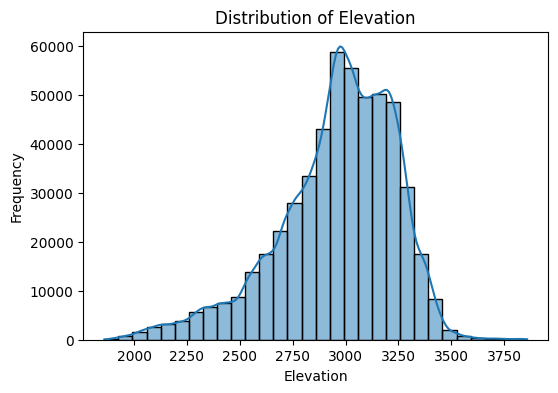

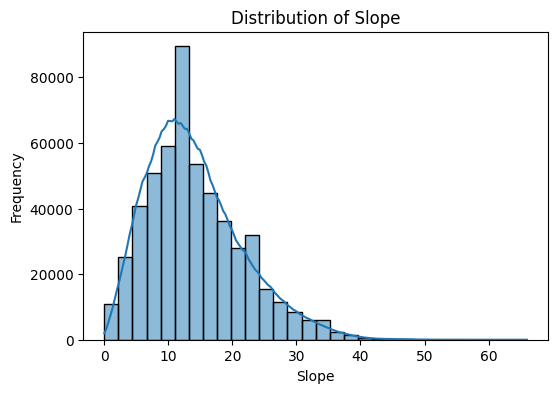

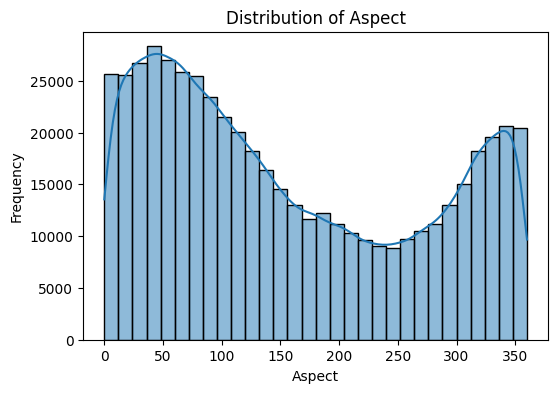

In [6]:
# Plot histogram for a few numeric features
numeric_features = ["Elevation", "Slope", "Aspect"]

for feature in numeric_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(X_train[feature], kde=True, bins=30)
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()


## Feature Correlation Heatmap

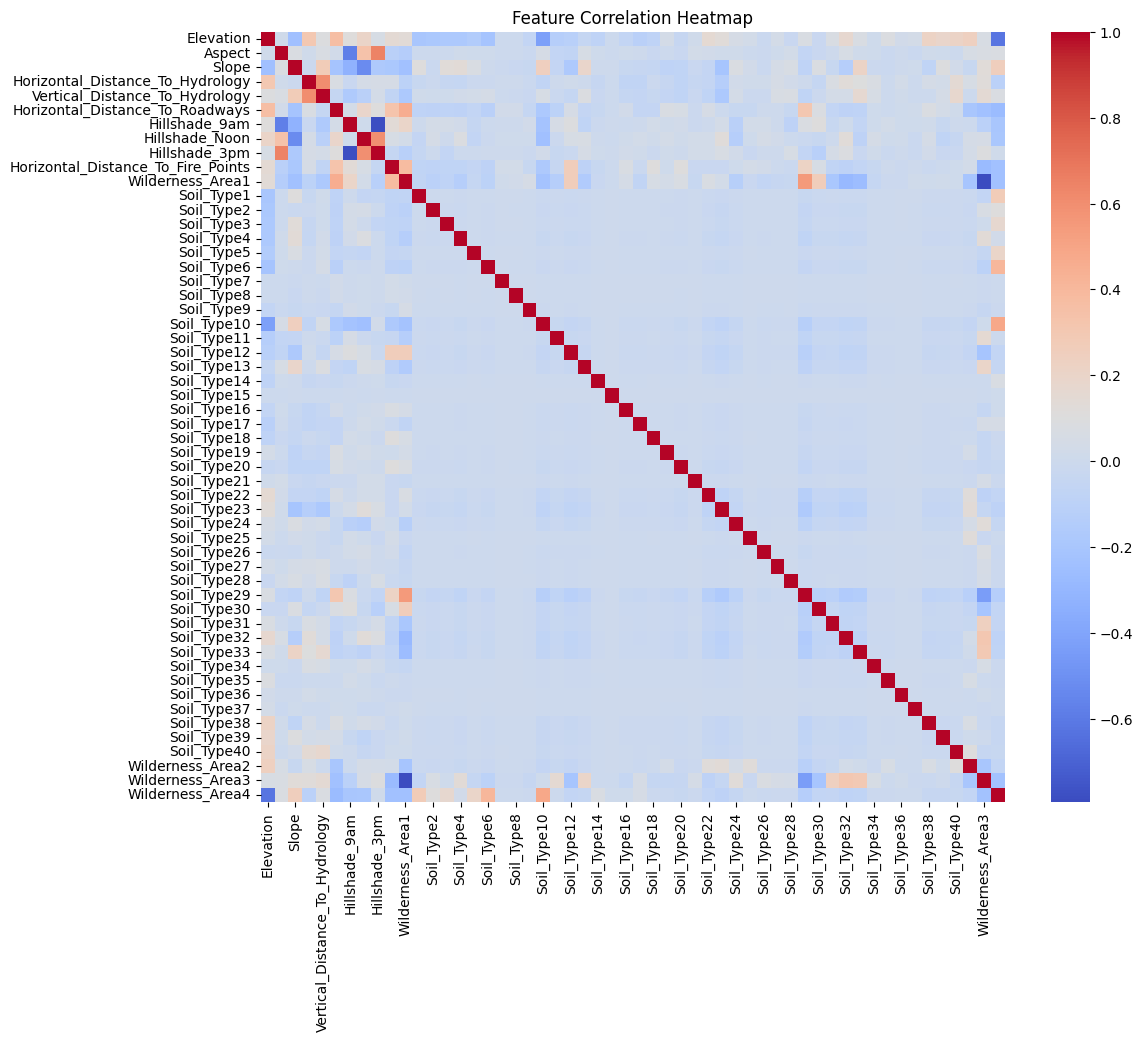

In [7]:
# Compute correlation matrix of numerical features
plt.figure(figsize=(12, 10))
sns.heatmap(X_train.corr(), cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

 # Part5: Convert Data to PyTorch Dataset

## Convert features and labels to NumPy

In [8]:
import torch
from torch.utils.data import Dataset, DataLoader

# Convert to NumPy arrays
X_train_np = X_train.to_numpy()
X_val_np = X_val.to_numpy()
X_test_np = X_test.to_numpy()

y_train_np = y_train.squeeze().to_numpy()
y_val_np = y_val.squeeze().to_numpy()
y_test_np = y_test.squeeze().to_numpy()


## Fix label values

In [9]:
# Fix label values: convert from [1, 7] to [0, 6]
y_train_np -= 1
y_val_np -= 1
y_test_np -= 1


## Define a Custom Dataset Class

In [10]:
class CovertypeDataset(Dataset):
    def __init__(self, features, labels):
        self.features = torch.tensor(features, dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.long)

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]


## Create DataLoaders

In [11]:
# Create datasets
train_dataset = CovertypeDataset(X_train_np, y_train_np)
val_dataset = CovertypeDataset(X_val_np, y_val_np)
test_dataset = CovertypeDataset(X_test_np, y_test_np)

# Create dataloaders
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)


# Normalize the Features

In [12]:
from sklearn.preprocessing import StandardScaler

# Fit on training data, apply to all sets
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Replace it
X_train_np = X_train_scaled
X_val_np = X_val_scaled
X_test_np = X_test_scaled


# Part 6: Define the Neural Network Architecture

## Define the Model

In [13]:
import torch.nn as nn
import torch.nn.functional as F

class CovertypeNet(nn.Module):
    def __init__(self):
        super(CovertypeNet, self).__init__()
        self.fc1 = nn.Linear(54, 256)
        self.bn1 = nn.BatchNorm1d(256)
        self.dropout1 = nn.Dropout(0.4)

        self.fc2 = nn.Linear(256, 128)
        self.bn2 = nn.BatchNorm1d(128)
        self.dropout2 = nn.Dropout(0.4)

        self.fc3 = nn.Linear(128, 64)
        self.bn3 = nn.BatchNorm1d(64)
        self.dropout3 = nn.Dropout(0.3)

        self.output = nn.Linear(64, 7)

    def forward(self, x):
        x = F.relu(self.bn1(self.fc1(x)))
        x = self.dropout1(x)

        x = F.relu(self.bn2(self.fc2(x)))
        x = self.dropout2(x)

        x = F.relu(self.bn3(self.fc3(x)))
        x = self.dropout3(x)

        x = self.output(x)  # No softmax needed (CrossEntropyLoss expects raw logits)
        return x


## Instantiate the Model

In [14]:
model = CovertypeNet()
print(model)


CovertypeNet(
  (fc1): Linear(in_features=54, out_features=256, bias=True)
  (bn1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout1): Dropout(p=0.4, inplace=False)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (bn2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout2): Dropout(p=0.4, inplace=False)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (bn3): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout3): Dropout(p=0.3, inplace=False)
  (output): Linear(in_features=64, out_features=7, bias=True)
)


 # Part 7: Use CUDA for Faster Training

##  Set the Device

In [15]:
# Set device to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")


Using device: cuda


## Move the Model to the Device

In [16]:
model = model.to(device)

## Make Sure Data is Moved to the Device During Training

# Part 8: Set Up the Optimizer, Loss Function, and LR Scheduler

## Define the Loss Function

In [17]:
criterion = nn.CrossEntropyLoss()


##  Define the Optimizer

In [18]:
optimizer = torch.optim.Adam(model.parameters(), lr=LR, weight_decay=1e-4)

## Add a Learning Rate Scheduler

In [19]:
from torch.optim.lr_scheduler import OneCycleLR
scheduler = OneCycleLR(
    optimizer,
    max_lr=0.005,                  # try between 0.003–0.01
    steps_per_epoch=len(train_loader),
    epochs=NUM_EPOCHS
)


# Part 9: Training and Validation Loops

## Accuracy Function (Helper)

In [20]:
def calculate_accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    correct = (preds == labels).sum().item()
    return correct / len(labels)


## Train for One Epoch

In [21]:
def train_one_epoch(model, loader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    running_acc = 0.0

    for features, labels in loader:
        features = features.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(features)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        running_acc += calculate_accuracy(outputs, labels)

    return running_loss / len(loader), running_acc / len(loader)


## Validation Function

In [22]:
def validate(model, loader, criterion, device):
    model.eval()
    running_loss = 0.0
    running_acc = 0.0

    with torch.no_grad():
        for features, labels in loader:
            features = features.to(device)
            labels = labels.to(device)

            outputs = model(features)
            loss = criterion(outputs, labels)

            running_loss += loss.item()
            running_acc += calculate_accuracy(outputs, labels)

    return running_loss / len(loader), running_acc / len(loader)


# Part 10: Full Training Loop

## Training Loop

In [23]:
print(device)

cuda


In [25]:

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(NUM_EPOCHS):
    train_loss, train_acc = train_one_epoch(model, train_loader, criterion, optimizer, device)
    val_loss, val_acc = validate(model, val_loader, criterion, device)

    # Step the scheduler
    scheduler.step()

    # Save metrics
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)

    print(f"Epoch {epoch+1}/{NUM_EPOCHS}")
    print(f"  Train Loss: {train_loss:.4f}, Accuracy: {train_acc:.4f}")
    print(f"  Val   Loss: {val_loss:.4f}, Accuracy: {val_acc:.4f}")


Epoch 1/40
  Train Loss: 0.6988, Accuracy: 0.7018
  Val   Loss: 0.6290, Accuracy: 0.7261
Epoch 2/40
  Train Loss: 0.6767, Accuracy: 0.7096
  Val   Loss: 0.6074, Accuracy: 0.7340
Epoch 3/40
  Train Loss: 0.6634, Accuracy: 0.7153
  Val   Loss: 0.5961, Accuracy: 0.7364
Epoch 4/40
  Train Loss: 0.6529, Accuracy: 0.7192
  Val   Loss: 0.5814, Accuracy: 0.7438
Epoch 5/40
  Train Loss: 0.6432, Accuracy: 0.7238
  Val   Loss: 0.5707, Accuracy: 0.7514
Epoch 6/40
  Train Loss: 0.6352, Accuracy: 0.7270
  Val   Loss: 0.5622, Accuracy: 0.7523
Epoch 7/40
  Train Loss: 0.6295, Accuracy: 0.7302
  Val   Loss: 0.5531, Accuracy: 0.7588
Epoch 8/40
  Train Loss: 0.6231, Accuracy: 0.7332
  Val   Loss: 0.5455, Accuracy: 0.7629
Epoch 9/40
  Train Loss: 0.6175, Accuracy: 0.7363
  Val   Loss: 0.5394, Accuracy: 0.7658
Epoch 10/40
  Train Loss: 0.6112, Accuracy: 0.7386
  Val   Loss: 0.5321, Accuracy: 0.7684
Epoch 11/40
  Train Loss: 0.6077, Accuracy: 0.7407
  Val   Loss: 0.5421, Accuracy: 0.7664
Epoch 12/40
  Train

## Plot Loss and Accuracy Curves

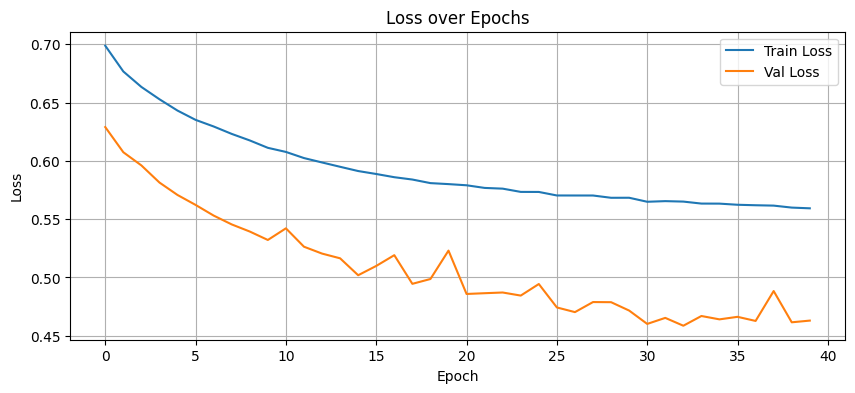

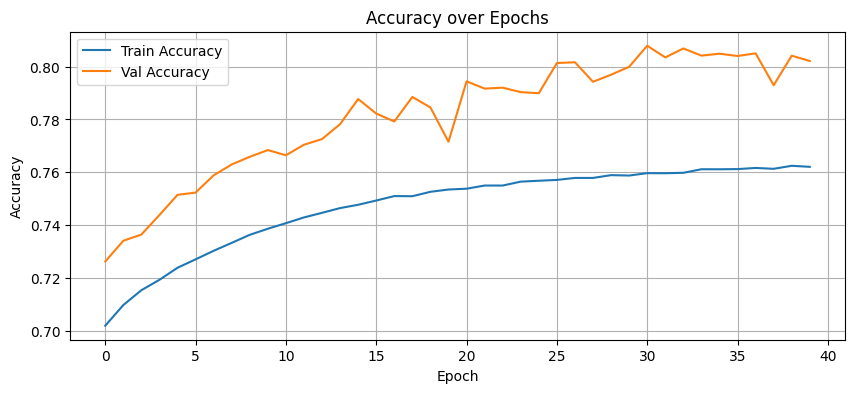

In [26]:
import matplotlib.pyplot as plt

# Plot Loss
plt.figure(figsize=(10, 4))
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Val Loss")
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# Plot Accuracy
plt.figure(figsize=(10, 4))
plt.plot(train_accuracies, label="Train Accuracy")
plt.plot(val_accuracies, label="Val Accuracy")
plt.title("Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


# Part 11: Final Model Evaluation

## Evaluate Accuracy on Test Set

In [27]:
model.eval()
test_loss = 0.0
test_acc = 0.0
all_preds = []
all_labels = []

with torch.no_grad():
    for features, labels in test_loader:
        features = features.to(device)
        labels = labels.to(device)

        outputs = model(features)
        loss = criterion(outputs, labels)

        test_loss += loss.item()
        test_acc += calculate_accuracy(outputs, labels)

        # Store predictions and true labels for confusion matrix
        preds = torch.argmax(outputs, dim=1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

test_loss /= len(test_loader)
test_acc /= len(test_loader)

print(f"\nTest Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")



Test Loss: 0.4638
Test Accuracy: 0.8020


## Plot Confusion Matrix

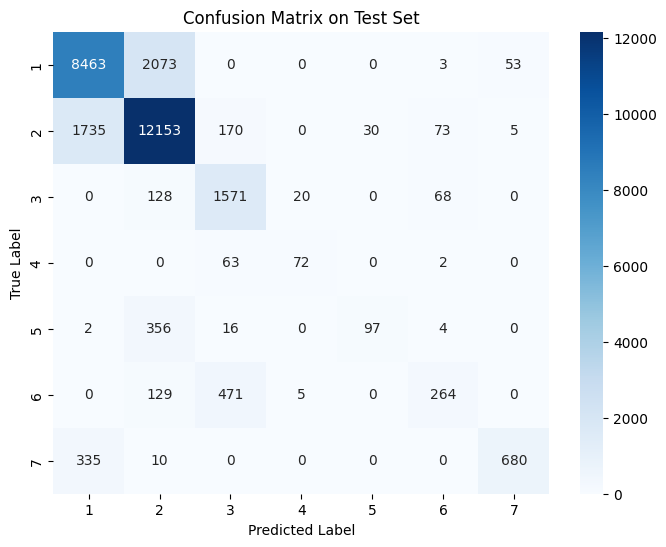

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create confusion matrix
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(1, 8), yticklabels=range(1, 8))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix on Test Set")
plt.show()
